In [91]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("muted")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [113]:
# open a capture with the normal data from a scenario
data = pd.read_pickle('Datasets/IOT23/Malware-Capture-33-1/zeek_normal.pkl')

## The structure of the dataset

In [114]:
data.head()

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,label,detailed_label,protocol_num,state_num
0,2018-12-20 20:10:05.010307074,192.168.1.1,60718,192.168.1.197,22,tcp,185.507847,OTH,0,375,26740,412,213616,Benign,missing,1,12
1,2018-12-20 20:10:12.053539991,192.168.1.197,123,217.30.75.147,123,udp,0.002241,SF,0,1,76,1,76,Benign,missing,0,2
2,2018-12-20 20:10:12.053551912,192.168.1.197,123,94.124.107.190,123,udp,0.006726,SF,0,1,76,1,76,Benign,missing,0,2
3,2018-12-20 20:10:20.053729057,192.168.1.197,123,89.221.214.130,123,udp,0.003734,SF,0,1,76,1,76,Benign,missing,0,2
4,2018-12-20 20:10:29.053585052,192.168.1.197,123,81.2.254.224,123,udp,0.004739,SF,0,1,76,1,76,Benign,missing,0,2


## Some basic statistics

In [115]:
data.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,1.380791e+06,1.380791e+06,1.380791e+06,1.380791e+06,1.380791e+06,1.380791e+06,1.380791e+06,1.380791e+06,1.380791e+06,1.380791e+06
mean,4.337323e+04,8.152512e+03,7.437936e-02,1.555256e+03,1.005369e+00,4.072152e+01,9.435172e-03,6.580366e-01,1.005613e+00,1.102781e-01
std,3.982430e+03,2.675908e+03,1.105550e+01,1.332034e+06,5.836827e-01,5.151102e+01,3.678553e-01,1.827066e+02,9.132242e-02,1.042261e+00
min,3.000000e+00,0.000000e+00,3.000000e-06,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.374600e+04,8.080000e+03,1.000000e-05,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,4.374600e+04,8.080000e+03,1.000000e-05,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,4.374600e+04,8.080000e+03,1.000000e-05,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,6.097800e+04,5.286900e+04,6.278848e+03,1.342177e+09,3.750000e+02,2.674000e+04,4.120000e+02,2.136160e+05,2.000000e+00,1.200000e+01


## Protocol distribution

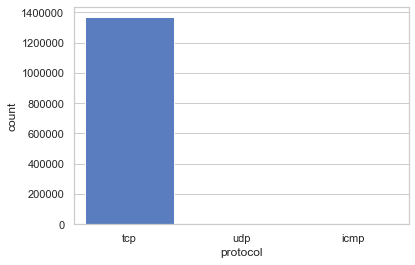

In [116]:
sns.countplot(x="protocol", data=data)

## Bytes Distribution

Text(0, 0.5, 'Number of bytes')

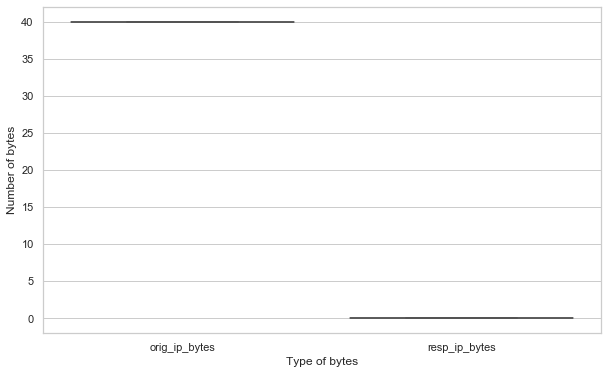

In [117]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(data[['orig_ip_bytes', 'resp_ip_bytes']]), showfliers=False)
plt.xlabel('Type of bytes')
plt.ylabel('Number of bytes')

## Number of hosts in the dataset

In [118]:
data['src_ip'].nunique()

7316

## Flows per host

In [119]:
flows_per_host = data.groupby('src_ip').size().reset_index().rename(columns={0: 'num_flows'})
flows_per_host

,src_ip,num_flows
0,1.11.151.2,1
1,1.172.49.145,1
2,1.177.135.185,1
3,1.208.96.114,1
4,1.21.125.254,1
...,...,...
7311,99.114.164.88,1
7312,99.243.96.57,1
7313,99.247.57.80,1
7314,99.57.44.62,1


Text(0, 0.5, 'Number of hosts')

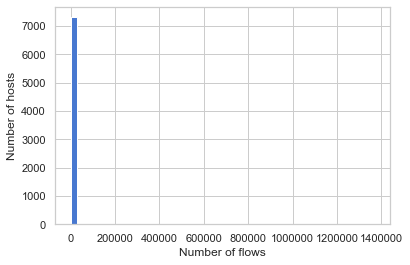

In [120]:
flows_per_host['num_flows'].hist(bins=50)
plt.xlabel('Number of flows')
plt.ylabel('Number of hosts')

Text(0, 0.5, 'Number of hosts with at least 100 flows')

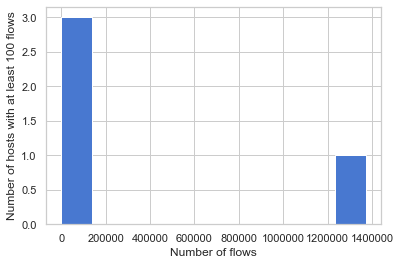

In [121]:
flows_per_host[flows_per_host['num_flows'] > 100]['num_flows'].hist(bins=10)
plt.xlabel('Number of flows')
plt.ylabel('Number of hosts with at least 100 flows')

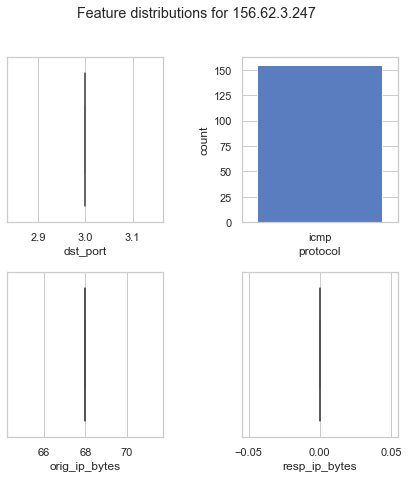

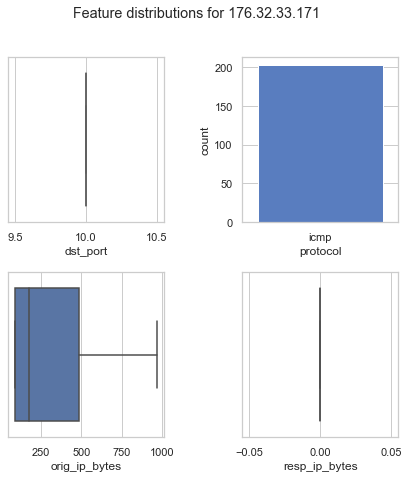

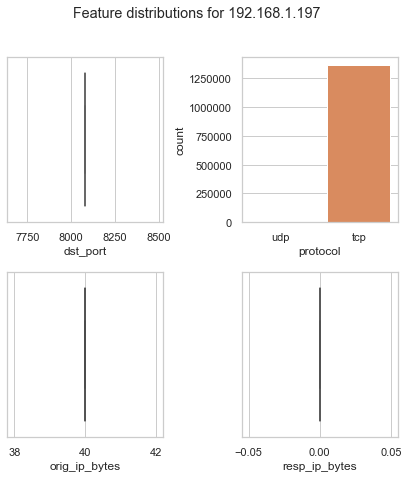

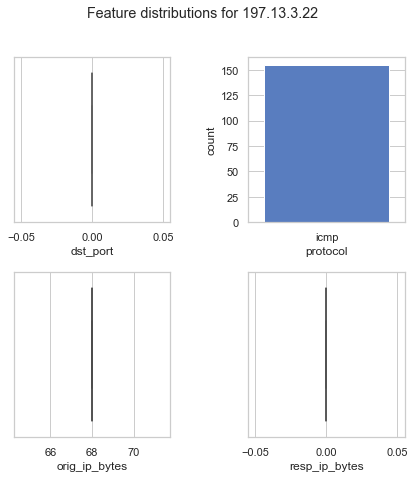

In [122]:
main_hosts = flows_per_host[flows_per_host['num_flows'] > 100]
for index, row in main_hosts.iterrows():
    host_data = data[data['src_ip'] == row['src_ip']]
    f, axes = plt.subplots(2, 2, figsize=(7, 7))
    f.suptitle('Feature distributions for ' + row['src_ip'])
    sns.boxplot(x=host_data['dst_port'], showfliers=False, color="y", ax=axes[0,0])
    sns.countplot(x=host_data['protocol'], ax=axes[0,1])
    sns.boxplot(x=host_data['orig_ip_bytes'], showfliers=False, color="b", ax=axes[1,0])
    sns.boxplot(x=host_data['resp_ip_bytes'], showfliers=False, color="r", ax=axes[1,1])
    plt.subplots_adjust(hspace=0.3, wspace=0.5)

## Number of connections in the dataset

In [123]:
flows_per_connection = data.groupby(['src_ip', 'dst_ip']).size().reset_index().rename(columns={0: 'num_flows'})
flows_per_connection.shape[0]

1362111

## Flows per connection

In [124]:
flows_per_connection

,src_ip,dst_ip,num_flows
0,1.11.151.2,192.168.1.197,1
1,1.172.49.145,192.168.1.197,1
2,1.177.135.185,192.168.1.197,1
3,1.208.96.114,192.168.1.197,1
4,1.21.125.254,192.168.1.197,1
...,...,...,...
1362106,99.114.164.88,192.168.1.197,1
1362107,99.243.96.57,192.168.1.197,1
1362108,99.247.57.80,192.168.1.197,1
1362109,99.57.44.62,192.168.1.197,1


Text(0, 0.5, 'Number of connections')

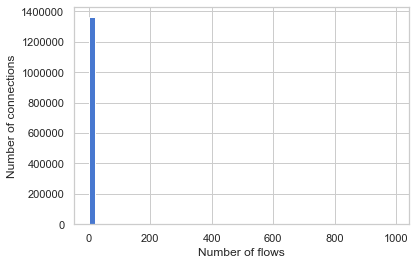

In [125]:
flows_per_connection['num_flows'].hist(bins=50)
plt.xlabel('Number of flows')
plt.ylabel('Number of connections')

## Statistics for long connections

Text(0, 0.5, 'Number of connections with at least 100 flows')

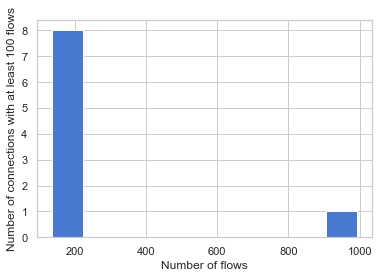

In [126]:
large_connections = flows_per_connection[flows_per_connection['num_flows'] > 100]
large_connections['num_flows'].hist(bins=10)
plt.xlabel('Number of flows')
plt.ylabel('Number of connections with at least 100 flows')

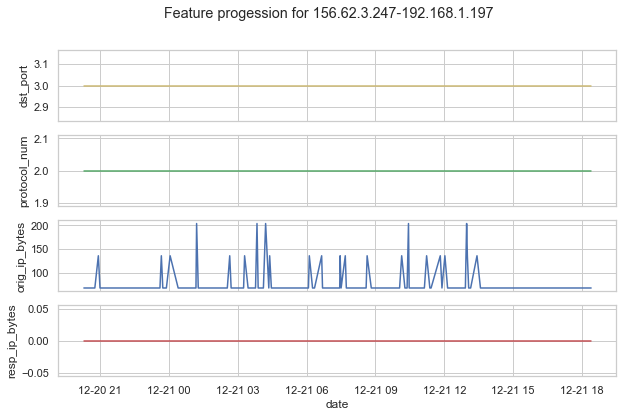

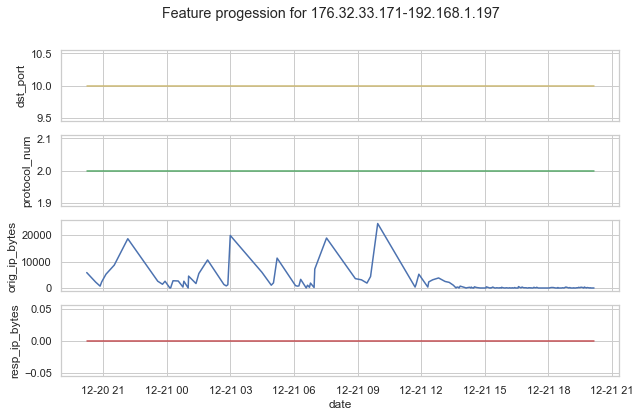

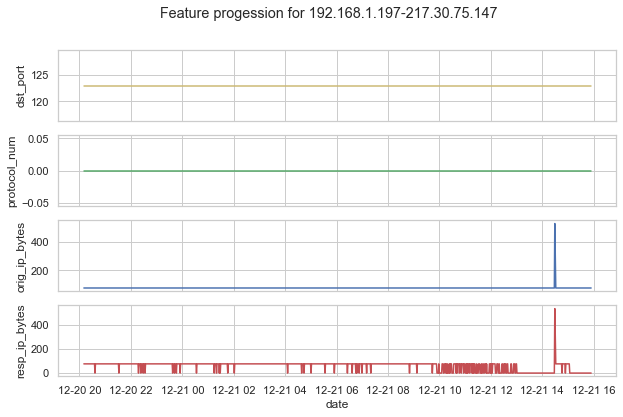

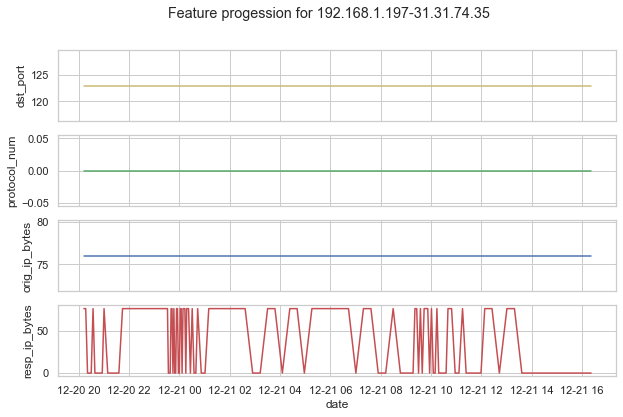

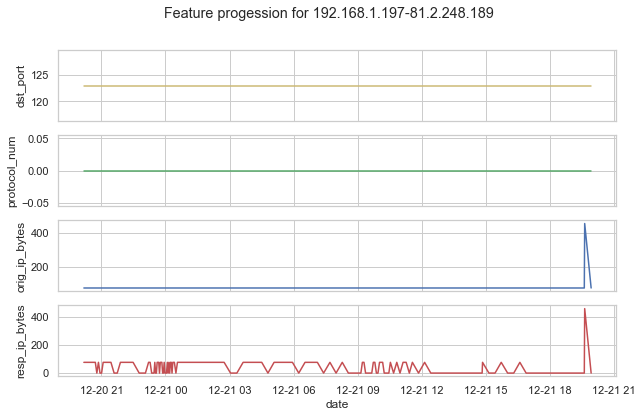

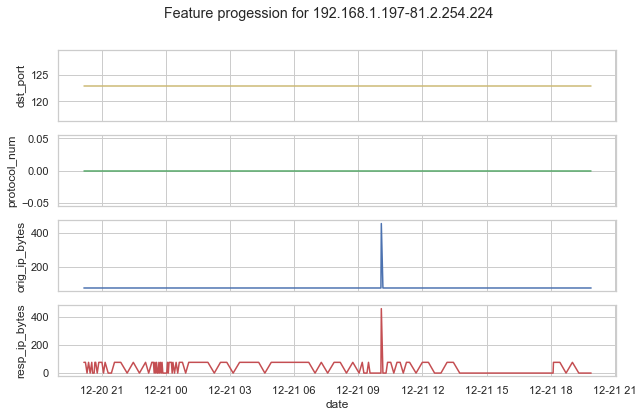

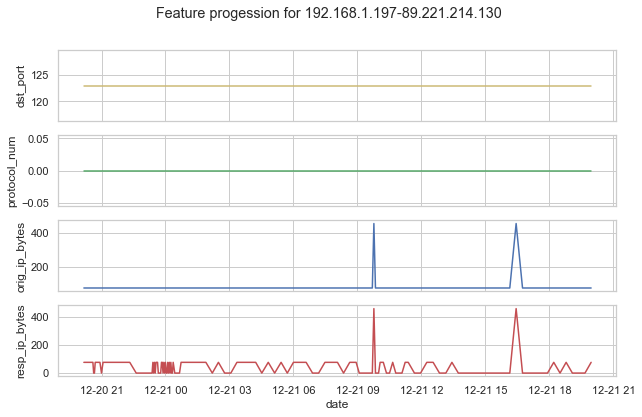

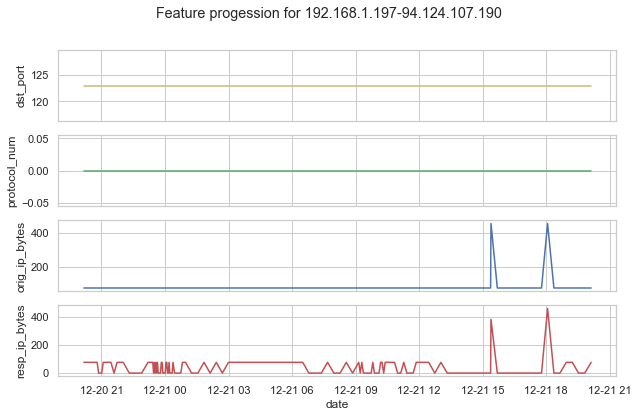

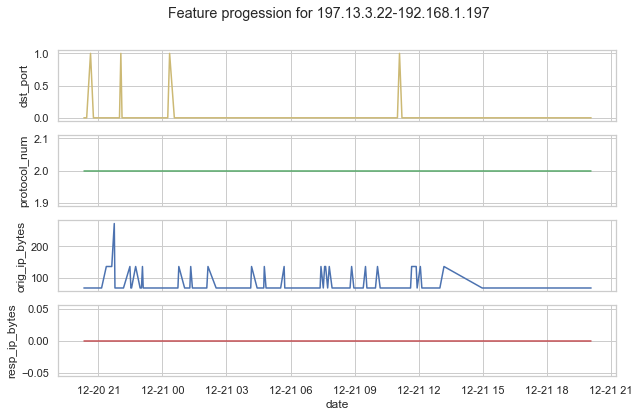

In [127]:
for index, row in large_connections.iterrows():
    f, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
    f.suptitle('Feature progession for ' + row['src_ip'] + '-' + row['dst_ip'])
    conn_data = data.loc[(data['src_ip'] == row['src_ip']) & (data['dst_ip'] == row['dst_ip'])].sort_values(by='date').reset_index(drop=True)
    sns.lineplot(x='date', y='dst_port', data=conn_data, color="y", ax=axes[0])
    sns.lineplot(x='date', y='protocol_num', data=conn_data, color="g", ax=axes[1])
    sns.lineplot(x='date', y='orig_ip_bytes', data=conn_data, color="b", ax=axes[2])
    sns.lineplot(x='date', y='resp_ip_bytes', data=conn_data, color="r", ax=axes[3])

## Statistics for short connections

Text(0, 0.5, 'Number of connections with less than 100 flows')

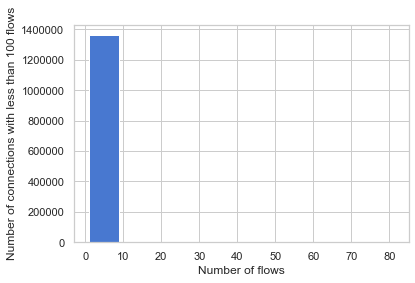

In [128]:
small_connections = flows_per_connection[flows_per_connection['num_flows'] <= 100]
small_connections['num_flows'].hist(bins=10)
plt.xlabel('Number of flows')
plt.ylabel('Number of connections with less than 100 flows')

In [129]:
small_data = data
for index, row in large_connections.iterrows():
    small_data = small_data.loc[~((small_data['src_ip'] == row['src_ip']) & (small_data['dst_ip'] == row['dst_ip']))]
small_data = small_data.sort_values(by='date').reset_index(drop=True)
small_data.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,1.378532e+06,1.378532e+06,1.378532e+06,1.378532e+06,1.378532e+06,1.378532e+06,1.378532e+06,1.378532e+06,1.378532e+06,1.378532e+06
mean,4.344415e+04,8.165714e+03,1.850921e-02,1.557805e+03,1.003407e+00,4.049139e+01,8.561281e-03,5.915242e-01,1.006517e+00,1.042653e-01
std,3.579318e+03,2.658134e+03,1.203043e+00,1.333125e+06,3.432212e-01,3.015637e+01,3.667588e-01,1.828400e+02,8.187698e-02,1.016048e+00
min,3.000000e+00,0.000000e+00,4.000000e-06,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.374600e+04,8.080000e+03,1.000000e-05,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,4.374600e+04,8.080000e+03,1.000000e-05,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,4.374600e+04,8.080000e+03,1.000000e-05,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,6.097800e+04,5.286900e+04,4.803127e+02,1.342177e+09,3.750000e+02,2.674000e+04,4.120000e+02,2.136160e+05,2.000000e+00,1.200000e+01


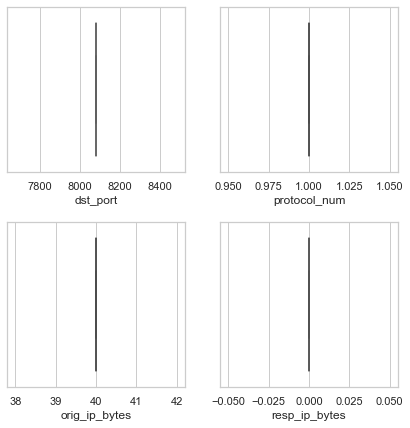

In [130]:
f, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.boxplot(x=small_data['dst_port'], showfliers=False, color="y", ax=axes[0,0])
sns.boxplot(x=small_data['protocol_num'], showfliers=False, color="g", ax=axes[0,1])
sns.boxplot(x=small_data['orig_ip_bytes'], showfliers=False, color="b", ax=axes[1,0])
sns.boxplot(x=small_data['resp_ip_bytes'], showfliers=False, color="r", ax=axes[1,1])
plt.subplots_adjust(hspace=0.3)

## Statistics destination ports on short connections 

In [131]:
flows_per_port = small_data.groupby(['src_ip', 'dst_port']).size().reset_index().rename(columns={0: 'num_flows'})
flows_per_port.shape[0]

7354

Text(0, 0.5, 'Number of source ip - destination port pair')

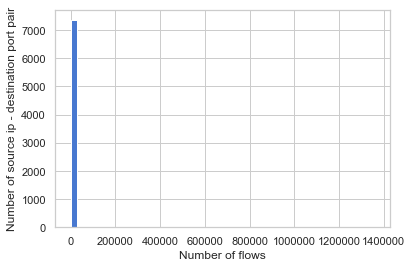

In [132]:
flows_per_port['num_flows'].hist(bins=50)
plt.xlabel('Number of flows')
plt.ylabel('Number of source ip - destination port pair')

## Maximum number of flows in one destination port from a specific source IP

In [135]:
flows_per_port['num_flows'].max()

1360600

## The destination port with the maximum traffic received

In [136]:
flows_per_port.iloc[flows_per_port['num_flows'].argmax()]['dst_port']

8080